In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb
import os
import warnings
warnings.filterwarnings("ignore")

In [21]:
model_type = ['cornet_z_cl', 'cornet_z_sl']

train_type = ['random','imagenet_noface', 'imagenet_oneface',
'imagenet_vggface', 'vggface_oneobject', 'vggface']

layer_type = [['decoder', 'decoder', 'decoder'],['decoder', 'decoder', 'decoder']]
sublayer_type = [['avgpool', 'linear','l2norm'],['avgpool', 'linear','output']]


seed = 1
curr_dir = '/user_data/vayzenbe/GitHub_Repos/ginn'
results_dir = f'{curr_dir}/results'
suf = ''

['cornet_z_cl', 'faces', 'avgpool']


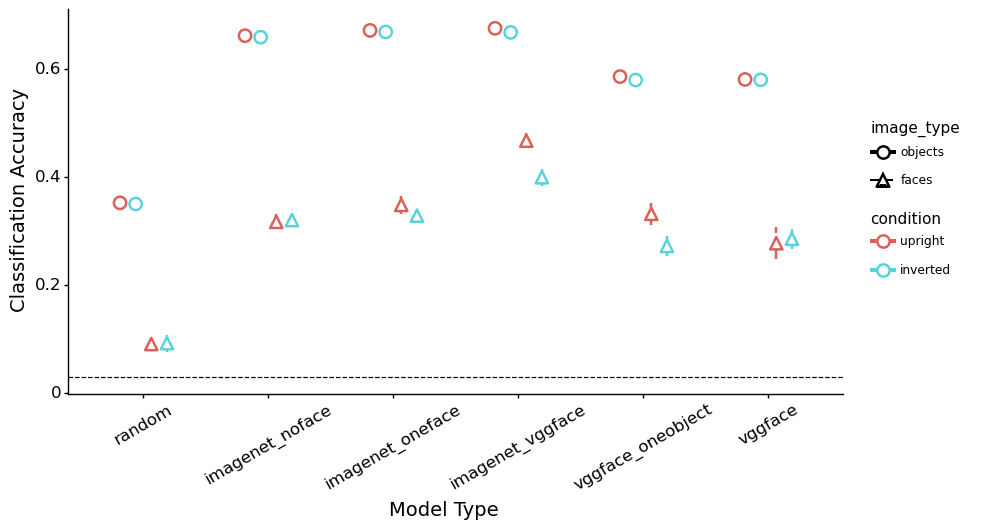


['cornet_z_cl', 'faces', 'linear']


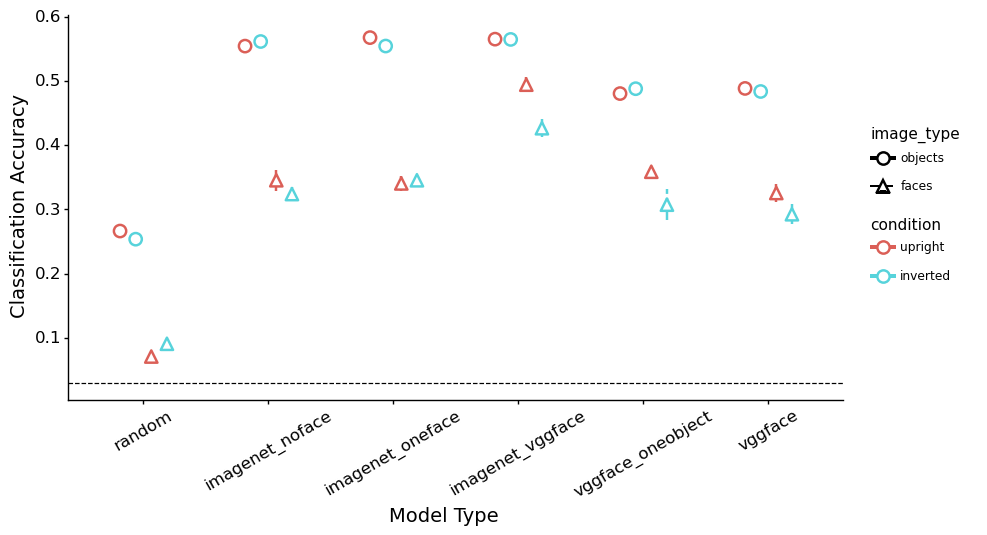


['cornet_z_cl', 'faces', 'l2norm']


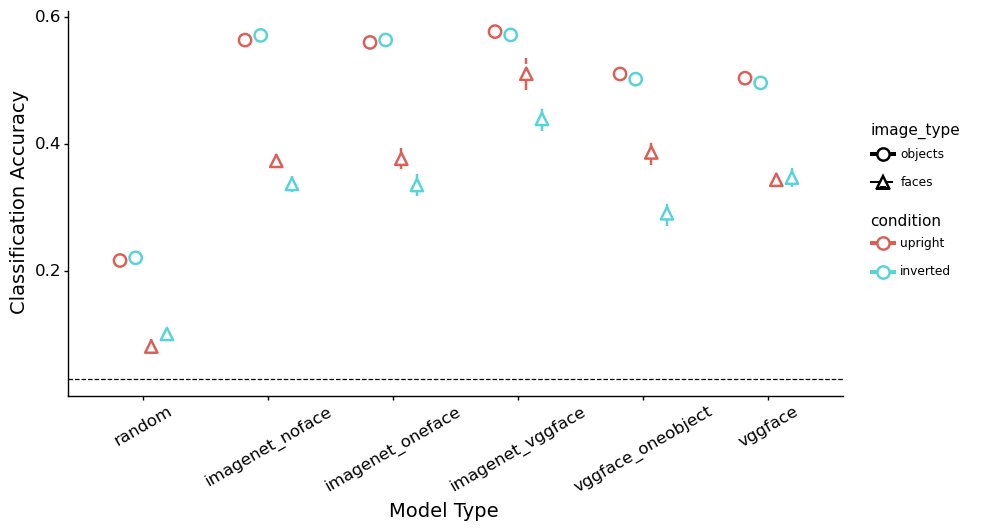


['cornet_z_sl', 'faces', 'avgpool']


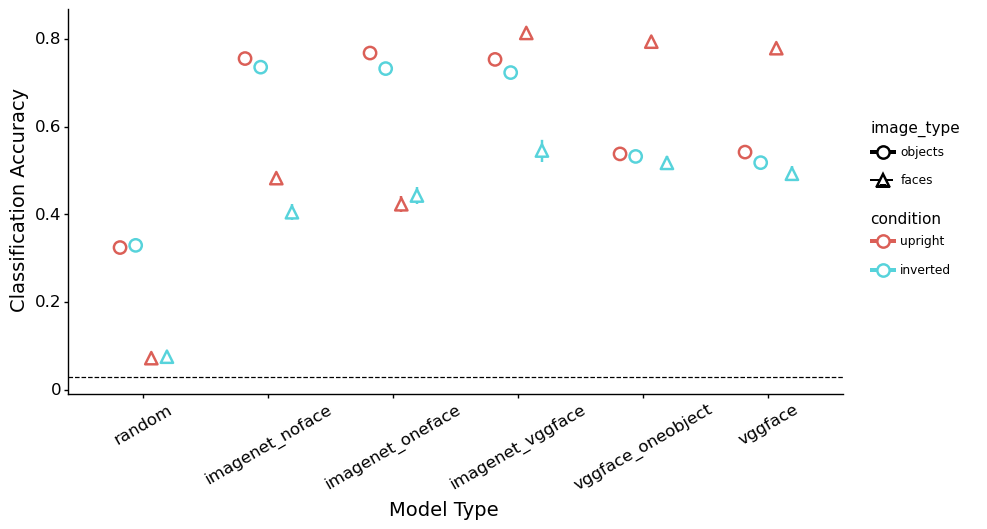


['cornet_z_sl', 'faces', 'linear']


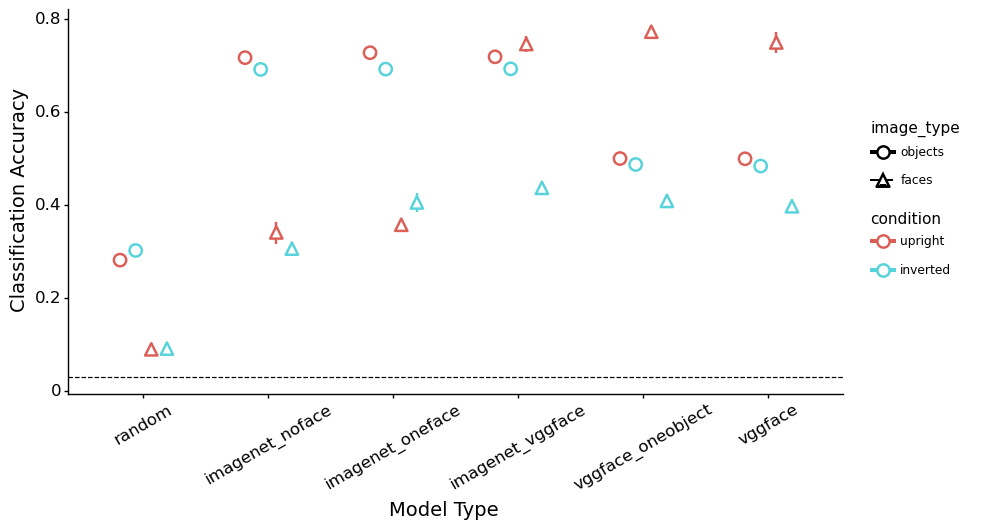


['cornet_z_sl', 'faces', 'output']


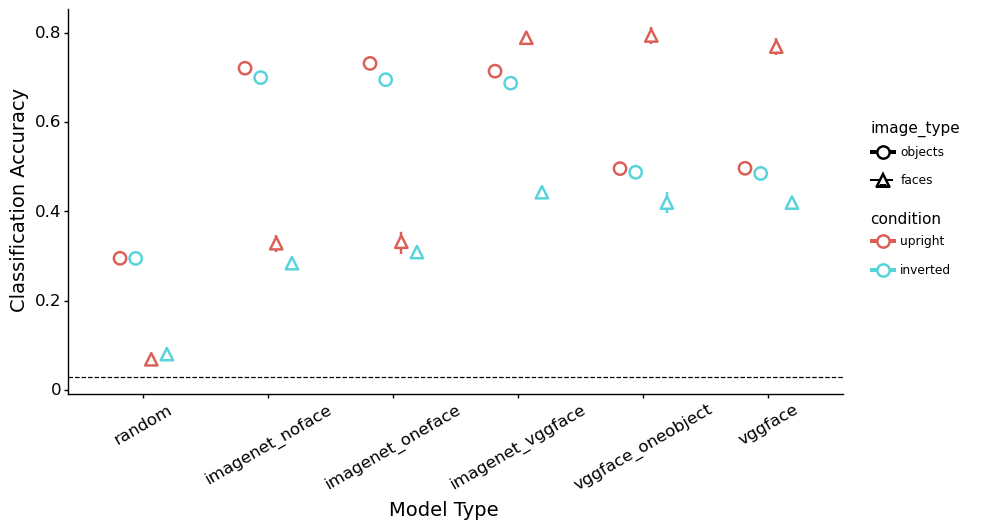

In [22]:
"""
Plot classification mean data
"""
exp = 'classify'

cond = ['upright','inverted']
test_type = ['objects', 'faces']

suf = ''

for mm in enumerate(model_type):
    for ll in sublayer_type[mm[0]]:
        
        summary_df = pd.DataFrame(columns = ['arch','train_type','image_type', 'condition', 'acc', 'se'])
        for trt in train_type:
            for tt in test_type:
                for cc in cond:
                    
                    curr_df = pd.read_csv(f'{results_dir}/{exp}/{mm[1]}_{trt}_{ll}_{tt}_{cc}{suf}.csv')
                    curr_data = pd.Series([mm[1],trt,tt,cc, curr_df['acc'].mean(), curr_df['acc'].sem()],
                                            index = summary_df.columns)
                    summary_df = summary_df.append(curr_data, ignore_index=True)

            #summary_df = pd.concat([summary_df, curr_data])
        summary_df['acc'] = summary_df['acc'].astype(float)
        summary_df['se'] = summary_df['se'].astype(float)

        summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
        summary_df['image_type'] = pd.Categorical(summary_df['image_type'], categories = test_type, ordered = False)
        summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = train_type, ordered = False)


#plot = ggplot(summary_df, aes(x = 'model', y = 'acc', fill = 'image_type')) + geom_col(stat='identity', position='dodge') + \
#     lims(y=(0, .5))
        print([mm[1], ll])
        plot = ggplot(summary_df, aes(x = 'train_type', y = 'acc', color = 'condition')) + \
            geom_linerange(aes(x='train_type',  ymax = 'acc + se', ymin = 'acc - se', linetype = 'image_type'), size = 1,position=position_dodge2(width=.5)) + \
            geom_point(aes(shape = 'image_type'), size = 4, fill = 'White', stroke = 1,position=position_dodge2(width=.5)) + \
            geom_hline(yintercept=.03, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Classification Accuracy') + \
                    theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                    axis_line=element_line(), 
                                                                                    panel_border=element_blank(),
                                                                                    figure_size = (10, 5))

        print(plot)
        del plot
        


In [17]:
print(f'{results_dir}/{exp}/{mm[1]}_{trt}_{layer}_{tt}_{cc}{suf}.csv')

/user_data/vayzenbe/GitHub_Repos/ginn/results/classify/cornet_z_cl_imagenet_noface_avgpool_objects_upright.csv


In [15]:
linear = summary_df

['cornet_z_cl', 'cropped_face', 'avgpool']


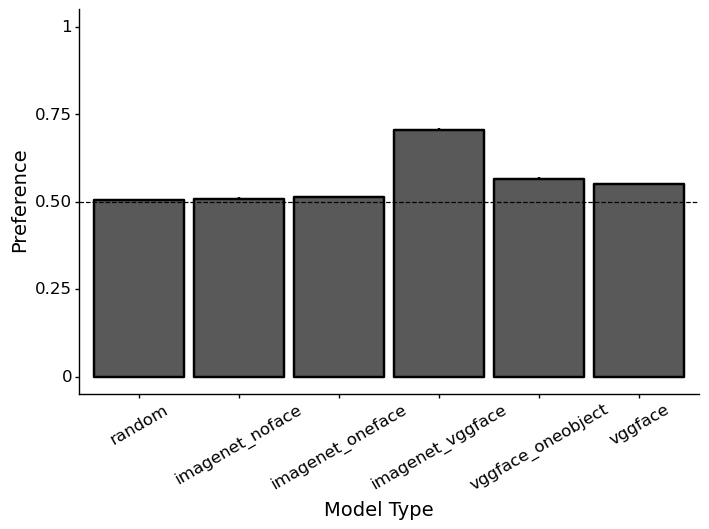


['cornet_z_cl', 'schematic', 'avgpool']


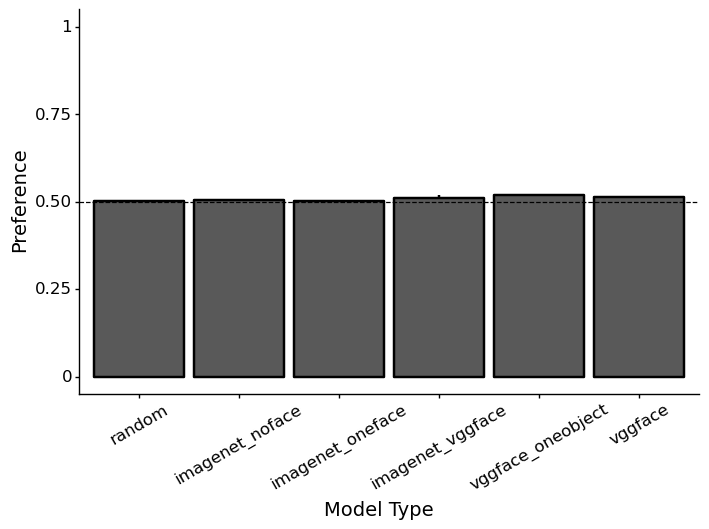


['cornet_z_cl', 'au', 'avgpool']


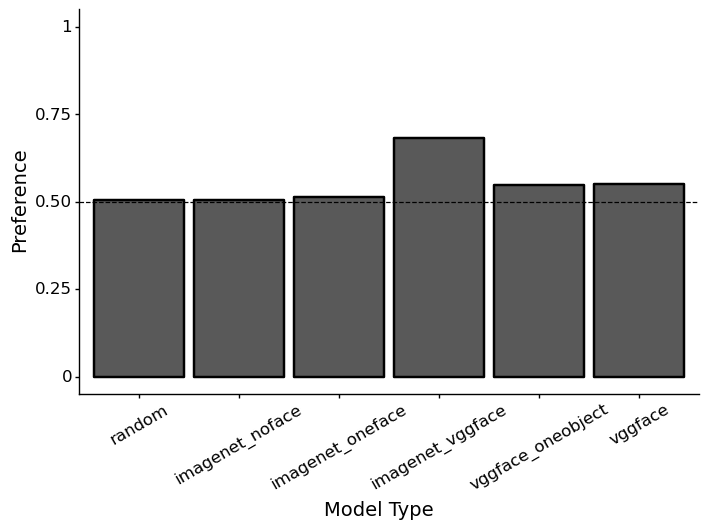


['cornet_z_cl', 'cropped_face', 'linear']


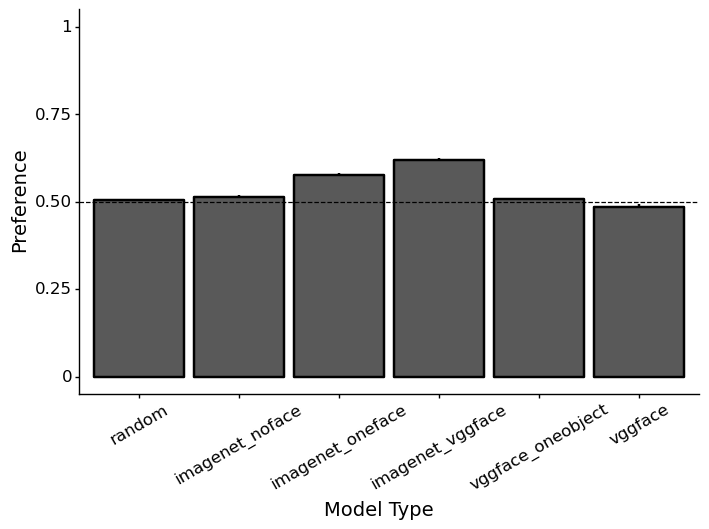


['cornet_z_cl', 'schematic', 'linear']


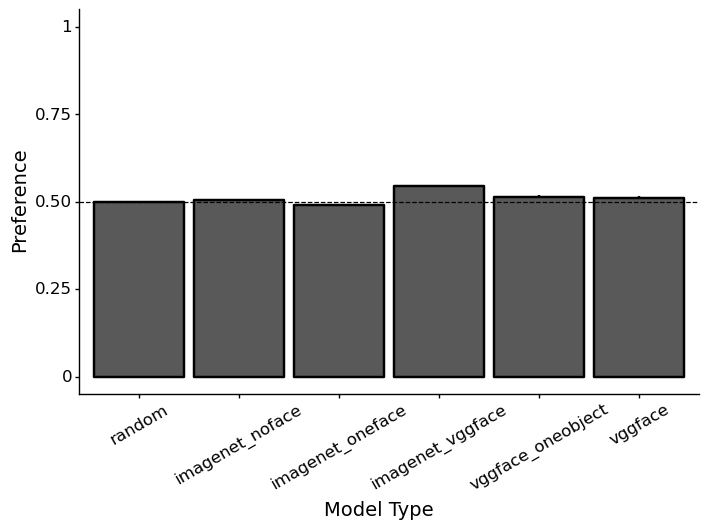


['cornet_z_cl', 'au', 'linear']


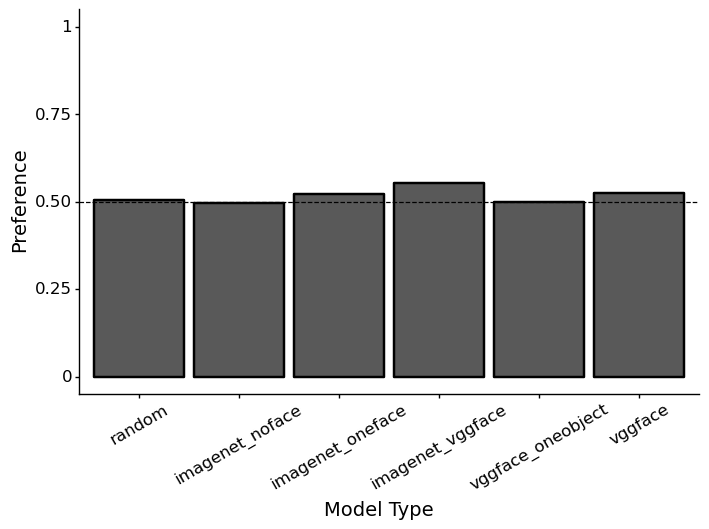


['cornet_z_cl', 'cropped_face', 'l2norm']


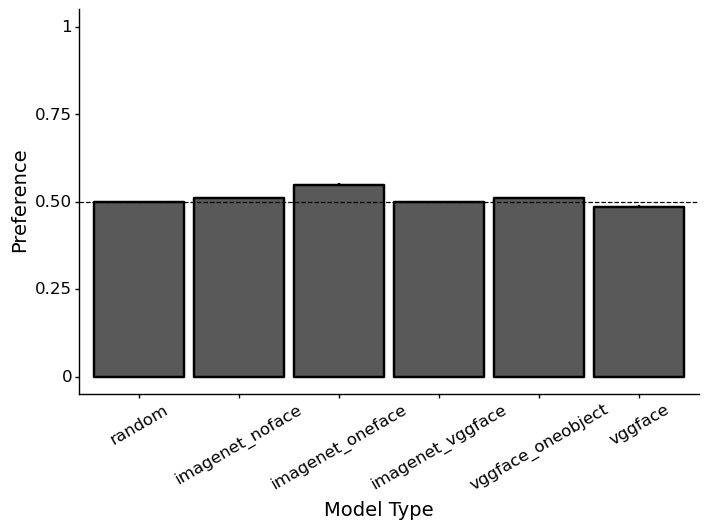


['cornet_z_cl', 'schematic', 'l2norm']


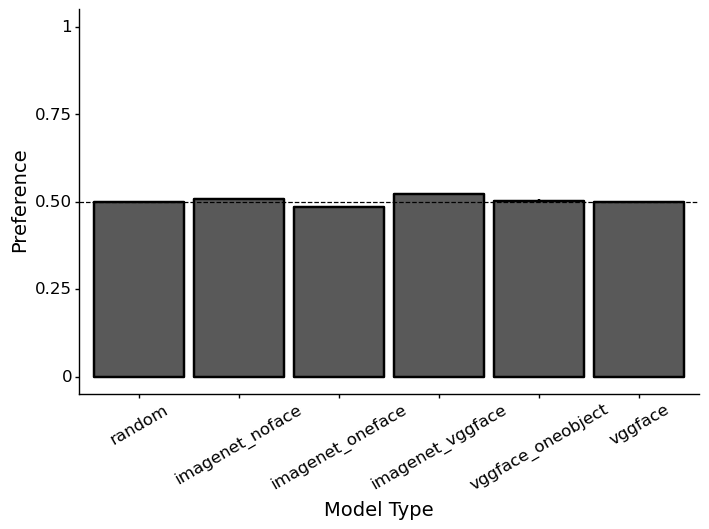


['cornet_z_cl', 'au', 'l2norm']


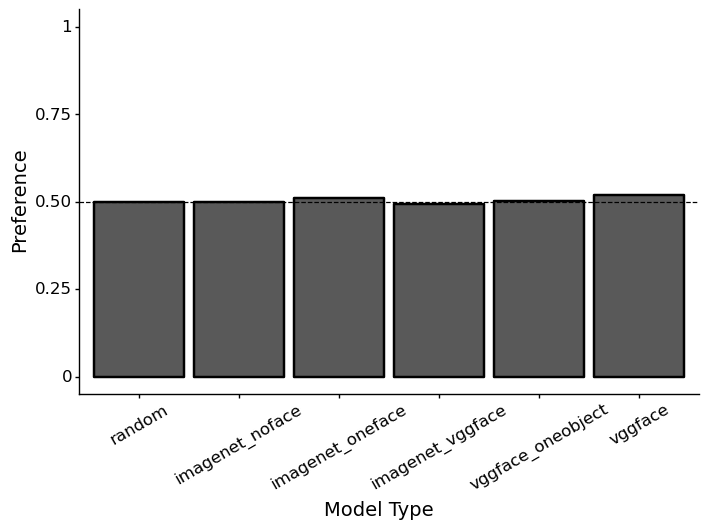


['cornet_z_sl', 'cropped_face', 'avgpool']


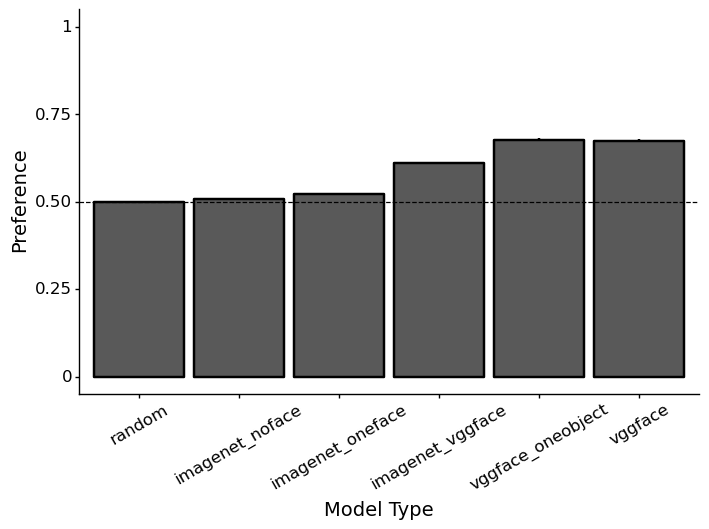


['cornet_z_sl', 'schematic', 'avgpool']


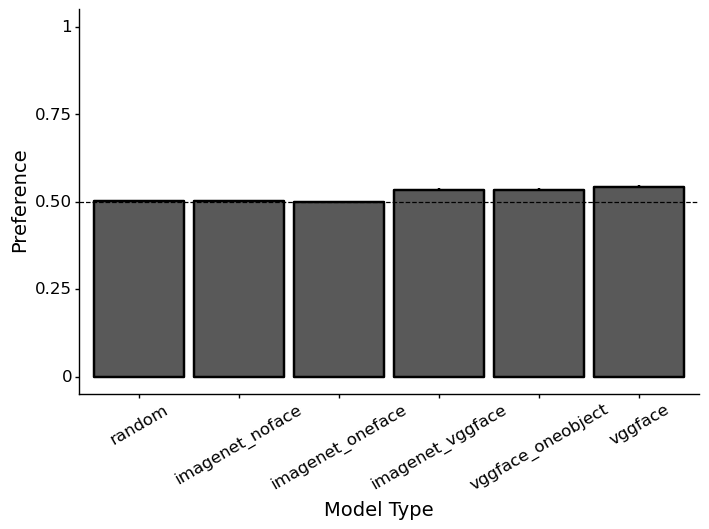


['cornet_z_sl', 'au', 'avgpool']


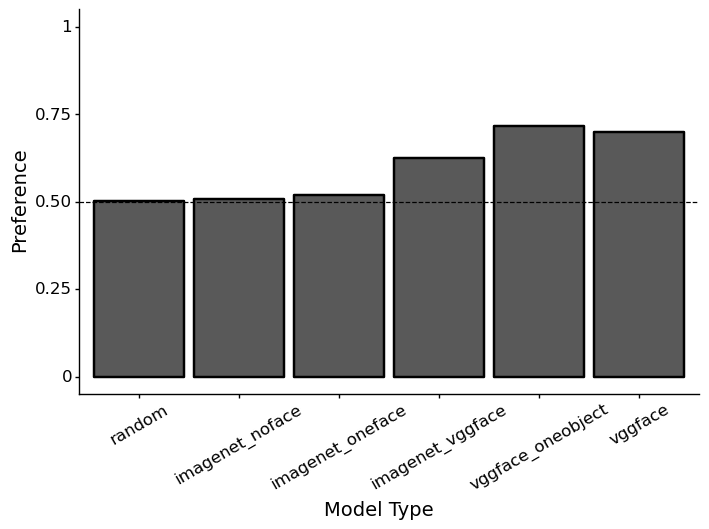


['cornet_z_sl', 'cropped_face', 'linear']


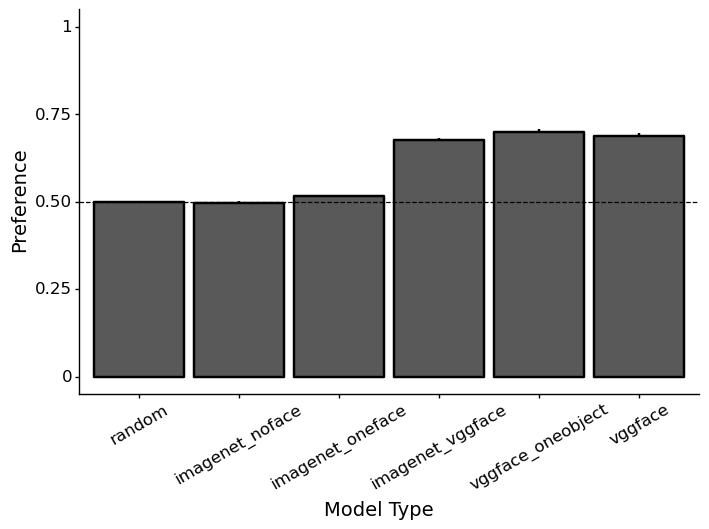


['cornet_z_sl', 'schematic', 'linear']


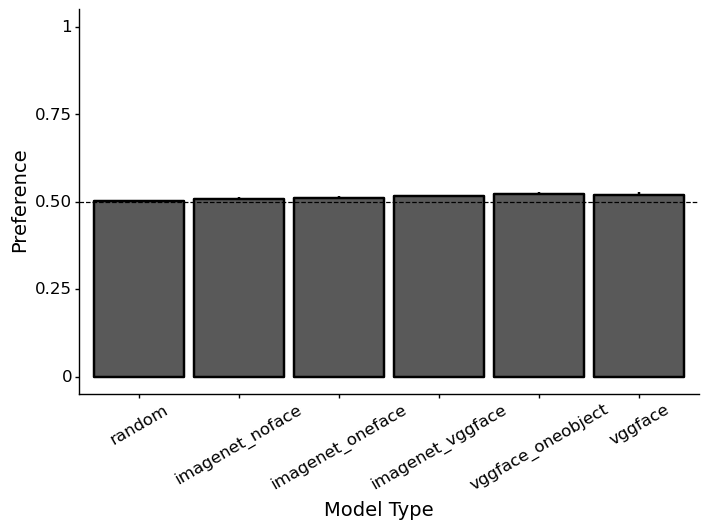


['cornet_z_sl', 'au', 'linear']


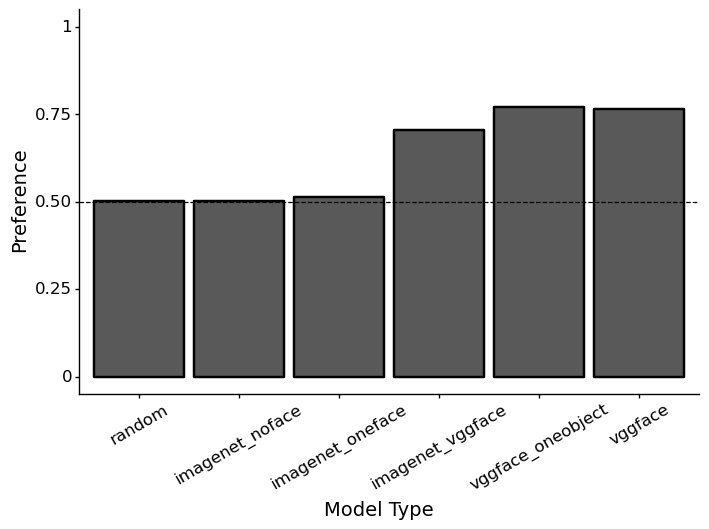


['cornet_z_sl', 'cropped_face', 'output']


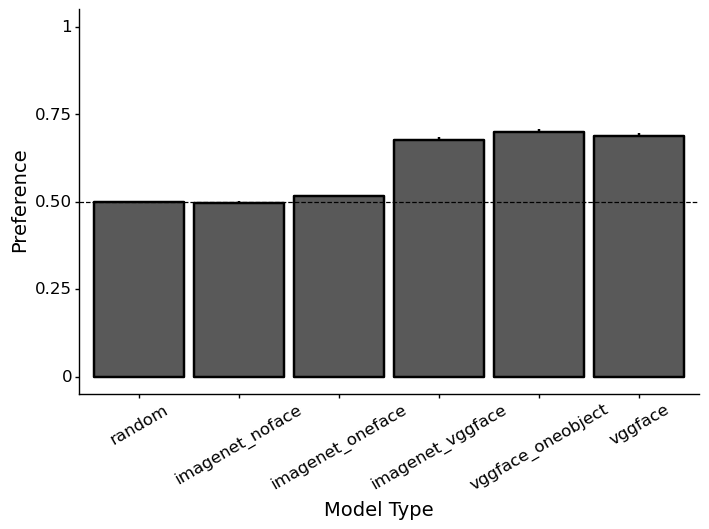


['cornet_z_sl', 'schematic', 'output']


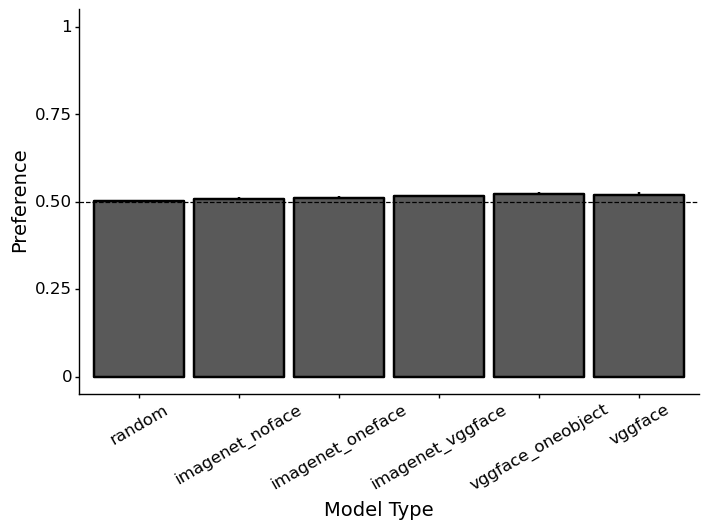


['cornet_z_sl', 'au', 'output']


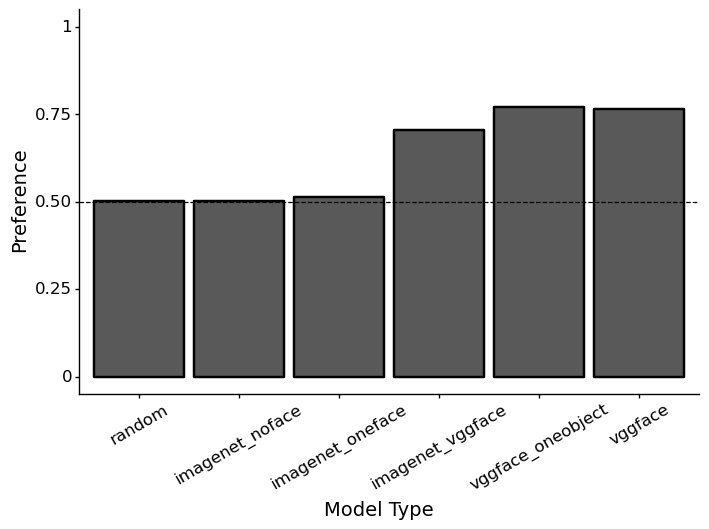

In [28]:
"""
Plot inversion preference mean data
"""
exp = 'inversion_pref'


cond = ['upright','inverted']
test_type = ['cropped_face','schematic','au']

suf = ''

for mm in enumerate(model_type):
    for ll in sublayer_type[mm[0]]:
        for tt in test_type:
            summary_df = pd.DataFrame(columns = ['arch','train_type', 'pref', 'ci_low', 'ci_high'])
            for trt in train_type:
            
            
                curr_df = pd.read_csv(f'{results_dir}/{exp}/{mm[1]}_{trt}_{ll}_{tt}{suf}.csv')
                curr_df = curr_df.loc[curr_df['test_stim'] == tt]
                
                curr_data = pd.Series([mm[1],trt,curr_df['pref'], curr_df['ci_high'],curr_df['ci_low'] ],
                                        index = summary_df.columns)
                summary_df = summary_df.append(curr_data, ignore_index=True)

                #summary_df = pd.concat([summary_df, curr_data])

            summary_df['pref'] = summary_df['pref'].astype(float)
            summary_df['ci_high'] = summary_df['ci_high'].astype(float)
            summary_df['ci_low'] = summary_df['ci_low'].astype(float)

            #summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
            summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = train_type, ordered = False)
            print([mm[1],tt, ll])

            plot = ggplot(summary_df, aes(x = 'train_type', y = 'pref')) + \
                    geom_linerange(aes(x='train_type',  ymax = 'ci_high', ymin = 'ci_low'), size = 1) + \
                    geom_col(stat='identity', size = 1, color = 'Black') + ylim(0,1) + \
                    geom_hline(yintercept=.5, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Preference') + \
                    theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                    axis_line=element_line(), 
                                                                                    panel_border=element_blank(),
                                                                                    figure_size = (8, 5))

            print(plot)
            del plot
            

In [15]:
summary_df

,arch,train_type,pref,ci_low,ci_high
0,cornet_z_cl,random,0.502254,0.501739,0.502765
1,cornet_z_cl,imagenet_noface,0.504654,0.502781,0.506590
2,cornet_z_cl,imagenet_oneface,0.506511,0.504474,0.508556
3,cornet_z_cl,imagenet_vggface,0.678096,0.672837,0.683426
4,cornet_z_cl,vggface_oneobject,0.560179,0.556498,0.563754
...,...,...,...,...,...
103,cornet_z_sl,imagenet_noface,0.501563,0.500279,0.502829
104,cornet_z_sl,imagenet_oneface,0.513368,0.512151,0.514596
105,cornet_z_sl,imagenet_vggface,0.725087,0.722486,0.727799
106,cornet_z_sl,vggface_oneobject,0.770276,0.767780,0.772716
